## 이미지 파일 이름 정렬

In [ ]:
import os
import os.path

file_path = "이미지 폴더 경로"  # jupyter notebook에서 실행 시 \ -> \\ 로 변경해줘야함.
file_names = os.listdir(file_path)
print(file_names)

i = 1
for name in file_names :
    src = os.path.join(file_path, name)
    dst = 'NAME' + str(i) +'.jpg'    # ex) 'fall1.jpg', 'fall2.jpg'......
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    i += 1

print(file_names)

## split-folders로 이미지 데이터 train/val/test 세트 나누기

### split-folders 이용하려면 input 디렉토리 구조가 형식을 갖추고 있어야한다.
  
  
  
input/  
    class1/  
        img1.jpg  
        img2.jpg  
        ...  
    class2/  
        imgN.jpg  
        ...  
    ...  

In [ ]:
!pip install split-folders

import splitfolders

# ratio 파라미터에 원하는 (train, validation, test) 비율을 입력합니다. ex) (0.7, 0.2, 0.1)
splitfolders.ratio(input = "input 폴더 경로", output="output 폴더 경로", seed= 70, ratio=(.7, .2, .1))

### output 디렉토리 구조 결과

output/  
    train/  
        class1/  
            img1.jpg  
            ...  
        class2/  
            imga.jpg  
            ...  
    val/  
        class1/  
            img2.jpg  
            ...  
        class2/  
            imgb.jpg  
            ...  
    test/  
        class1/  
            img3.jpg  
            ...  
        class2/  
            imgc.jpg  
            ...  

## 라벨링 정보가 들어있는 txt 파일들 output 폴더로 옮기기  

output/train,val,tese/에 각각 labels 라는 폴더를 생성해준다.

yolo_mark 라벨링 파일들은 "Yolo_mark-master\x64\Release\data\img" 안에 있다 

In [ ]:
import os
import shutil

# 이미지 폴더 안 파일 이름들 리스트로 받기
path_dir = "이미지가 들어있는 폴더 경로"    # ex) output\train\images
file_list2 = os.listdir(path_dir) 
print(file_list)

# 받아온 파일 리스트에서  '.jpg' 지우기
lines2 = [line.rstrip('.jpg') for line in file_list]

print(lines2)

path_dir = "C:\\Yolo_mark-master\\x64\\Release\\data\\img\\"  
move_path_dir = "파일들이 옮겨질 폴더 경로\\"   # ex) output\\train\\labels\\

# 리스트에서 조건에 맞는 파일을 찾으며 다른 폴더로 분류하기
for item in lines2:  # loop 를 돌면서 리스트안에 데이터를 하나씩 확인
     # 원본경로 + 파일이름 , 옮길 경로 + 파일이름 .. 
    shutil.copy(path_dir+item+'.txt'  , move_path_dir+item+'.txt' )

## output 폴더에 이미지와 라벨 데이터들이 옮겨졌으면 data.yaml파일 하나를 생성한다.

### yaml파일 형식  예

test: ../test/images  
train: ../train/images  
val: ../valid/images  
  
nc: 2  
names: ['fall', 'stand']    
  
test, train, val 경로는 모델 돌릴 때 수정.

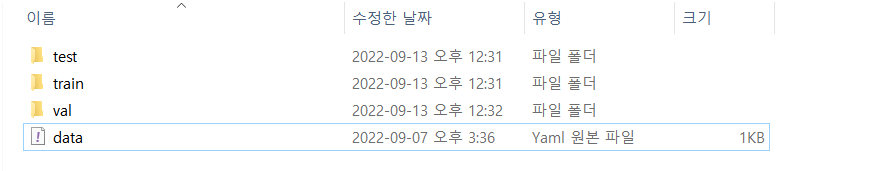

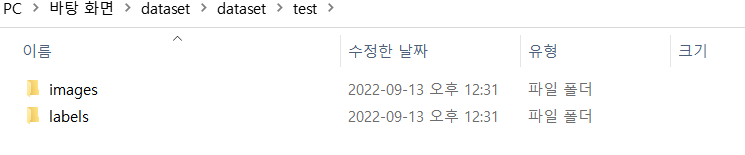

## data.yaml 수정 

In [ ]:
# data.yaml 파일 출력

!cat /content/nn_data/data.yaml

In [ ]:
%cd /
from glob import glob

train_img_list = glob('/content/nn_data/train/images/*.jpg')

test_img_list = glob('/content/nn_data/test/images/*.jpg')

val_img_list = glob('/content/nn_data/val/images/*.jpg')

print(len(train_img_list))
print(len(test_img_list))
print(len(val_img_list))

In [ ]:
with open('/content/nn_data/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/nn_data/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/nn_data/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
import yaml

with open('/content/nn_data/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/nn_data/train.txt'
data['test'] = '/content/nn_data/test.txt'
data['val'] = '/content/nn_data/val.txt'

with open('/content/nn_data/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)